In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 5.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from ultralytics import YOLO
import os
import numpy as np
import pandas as pd
import shutil

In [18]:
# Load a model
# model = YOLO("yolov8n.pt")  #  ---  detection
# model = YOLO("yolov8n-cls.pt")  #  --- classification
model = YOLO('yolov8n-seg.pt')  #  --- segmentation
# model = YOLO('yolov8n-pose.pt')  #  --- Pose/keypoint detection

In [7]:
!mkdir -p /content/gdrive/MyDrive/CV\ Course/DATA/YOLO_MASK_SEGMENTATION/

In [8]:
!ls /content/gdrive/MyDrive/*zip

 /content/gdrive/MyDrive/app.zip
 /content/gdrive/MyDrive/caltech101.zip
 /content/gdrive/MyDrive/contiguous-area-detector-alpha.zip
 /content/gdrive/MyDrive/Documentation-c-a-d.zip
 /content/gdrive/MyDrive/frames1.zip
 /content/gdrive/MyDrive/frames.zip
 /content/gdrive/MyDrive/imager-web-app-0.0.1.zip
'/content/gdrive/MyDrive/images+(2).zip'
'/content/gdrive/MyDrive/Pothole+segmentation+yolov8+(1).zip'
 /content/gdrive/MyDrive/pretrained.zip
'/content/gdrive/MyDrive/Weather_yolo_img_clsf_data+(1).zip'
 /content/gdrive/MyDrive/zoi-app-edgelib.3.zip


In [11]:
!unzip /content/gdrive/MyDrive/CV\ Course/DATA/YOLO_MASK_SEGMENTATION/Potholesegmentationyolov8.zip

Archive:  /content/gdrive/MyDrive/CV Course/DATA/YOLO_MASK_SEGMENTATION/Potholesegmentationyolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/10_jpg.rf.bd9d6d969e2b1e8ef9497fc840ea17eb.jpg  
 extracting: test/images/112_jpg.rf.417c588720d851b9735076f6eb9afc68.jpg  
 extracting: test/images/115_jpg.rf.a49cae50092edfce1aafb83fef42e5ce.jpg  
 extracting: test/images/136_jpg.rf.d827a240d4bbc2008814187fe5f99f98.jpg  
 extracting: test/images/142_jpg.rf.899b78605933391518e08fe1f7a5ecc0.jpg  
 extracting: test/images/151_jpg.rf.63ce1864b3e9fc5516dd034c200e5b4a.jpg  
 extracting: test/images/15_jpg.rf.21badb2cbbb1e85eef9754f61d242ff1.jpg  
 extracting: test/images/177_jpg.rf.7acb4a60e3aba3c08e77e14f573d4666.jpg  
 extracting: test/images/185_jpg.rf.423310f54d298f31aa0fcdefabb765df.jpg  
 extracting: test/images/194_jpg.rf.0cb1ed142d920105593cf96ef69e0c

In [13]:
!cp /content/gdrive/MyDrive/*yaml /content/data.yaml

In [14]:
!ls /content

data.yaml  README.dataset.txt	sample_data  train  yolov8n-seg.pt
gdrive	   README.roboflow.txt	test	     valid


In [19]:
results = model('/content/test/images/10_jpg.rf.bd9d6d969e2b1e8ef9497fc840ea17eb.jpg')


image 1/1 /content/test/images/10_jpg.rf.bd9d6d969e2b1e8ef9497fc840ea17eb.jpg: 640x640 1 person, 16.9ms
Speed: 5.7ms preprocess, 16.9ms inference, 708.7ms postprocess per image at shape (1, 3, 640, 640)


In [20]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [36]:
results = model.train(data='/content/data.yaml', epochs=100, imgsz=64)

Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/runs/segment/train2/weights/best.pt, data=/content/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train322, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

train: Scanning /content/train/labels.cache... 424 images, 0 backgrounds, 0 corrupt: 100%|██████████| 424/424 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels.cache... 124 images, 2 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?, ?it/s]


Plotting labels to runs/segment/train322/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/segment/train322
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.818G      1.848      2.855      1.052      1.198         24         64: 100%|██████████| 27/27 [00:08<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        124        573      0.386       0.18      0.172     0.0735      0.359      0.164      0.166     0.0635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.654G      1.967      3.322      1.155      1.203         16         64: 100%|██████████| 27/27 [00:09<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        124        573      0.366      0.168      0.158     0.0655      0.321      0.157      0.146     0.0572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.652G      1.992      3.306      1.204       1.25         21         64: 100%|██████████| 27/27 [00:05<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all        124        573        0.4      0.169      0.168     0.0651      0.372      0.162      0.154     0.0567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.652G      2.101      3.151      1.207      1.252         27         64: 100%|██████████| 27/27 [00:06<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        124        573      0.336      0.194      0.161      0.067      0.285      0.182      0.144     0.0516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.652G      2.063      3.278      1.193      1.249         21         64: 100%|██████████| 27/27 [00:07<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all        124        573      0.332      0.183      0.166     0.0662      0.247      0.194      0.156     0.0566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.652G      2.085      3.275      1.167      1.236         36         64: 100%|██████████| 27/27 [00:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        124        573      0.332      0.201      0.168     0.0689      0.273       0.22      0.157     0.0552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.652G      2.015      3.155       1.22      1.228         31         64: 100%|██████████| 27/27 [00:09<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        124        573      0.389      0.206      0.194     0.0729      0.334      0.213      0.181     0.0671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.652G      2.066      3.316      1.164      1.236         54         64: 100%|██████████| 27/27 [00:05<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]

                   all        124        573      0.442      0.197      0.199     0.0753      0.301      0.208      0.181     0.0648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.652G      1.968      3.116      1.193      1.228         16         64: 100%|██████████| 27/27 [00:07<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        124        573      0.389      0.213      0.204     0.0812      0.336      0.225      0.186     0.0704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.652G      2.024      3.082      1.184      1.251         44         64: 100%|██████████| 27/27 [00:06<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        124        573      0.464      0.192      0.188     0.0741      0.382      0.218      0.191     0.0759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.652G      2.035      3.063      1.181      1.214         14         64: 100%|██████████| 27/27 [00:05<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        124        573      0.419      0.209      0.188      0.078      0.356      0.201      0.176     0.0653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.652G      1.945      3.113      1.155      1.174         15         64: 100%|██████████| 27/27 [00:08<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        124        573      0.467      0.194      0.194     0.0818      0.348      0.218      0.192     0.0748



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.652G      2.006      3.063      1.161      1.194         28         64: 100%|██████████| 27/27 [00:05<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all        124        573      0.389      0.225      0.202     0.0831      0.395      0.225      0.214     0.0782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.652G      1.904      2.998      1.173      1.169         21         64: 100%|██████████| 27/27 [00:08<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        124        573      0.502      0.209      0.215     0.0888      0.362      0.227      0.203     0.0715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.652G      1.913      2.975       1.16      1.175         21         64: 100%|██████████| 27/27 [00:05<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]

                   all        124        573      0.495      0.211      0.216     0.0847      0.373      0.236      0.214     0.0815



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.652G      1.902      2.959      1.141      1.147         41         64: 100%|██████████| 27/27 [00:07<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        124        573      0.443      0.209      0.212      0.088      0.403      0.223      0.215     0.0787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.652G      1.921      3.003      1.128      1.178         41         64: 100%|██████████| 27/27 [00:06<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all        124        573      0.407      0.231       0.21     0.0848      0.387      0.227      0.205     0.0775



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.652G      1.962      3.015       1.17      1.171         15         64: 100%|██████████| 27/27 [00:05<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        124        573      0.436      0.204        0.2     0.0842      0.415      0.211      0.194     0.0704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.652G      1.927      2.897      1.167      1.152         24         64: 100%|██████████| 27/27 [00:08<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all        124        573      0.441      0.206        0.2      0.085      0.375      0.234      0.212     0.0757



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.652G      1.869      2.832      1.118      1.124         22         64: 100%|██████████| 27/27 [00:05<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all        124        573      0.465      0.197      0.198     0.0805      0.407       0.19      0.186     0.0666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.652G      1.856       2.81      1.105      1.152         11         64: 100%|██████████| 27/27 [00:07<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        124        573      0.453      0.216      0.202     0.0796      0.423      0.213      0.193     0.0747



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.652G      1.912      2.831      1.087      1.156         27         64: 100%|██████████| 27/27 [00:06<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all        124        573      0.436      0.209      0.194     0.0839      0.369      0.201       0.17     0.0697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.652G      1.866      2.908      1.102      1.137         35         64: 100%|██████████| 27/27 [00:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        124        573      0.472      0.213      0.216     0.0896      0.449      0.201      0.204     0.0805



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.652G      1.841      2.789      1.088      1.141         47         64: 100%|██████████| 27/27 [00:09<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all        124        573      0.496      0.223      0.242      0.101      0.393      0.201      0.213     0.0786



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.652G      1.884       2.78      1.113      1.115         23         64: 100%|██████████| 27/27 [00:05<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all        124        573      0.468      0.232      0.241      0.101      0.422      0.223      0.227     0.0812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.652G      1.805      2.879      1.077      1.125         20         64: 100%|██████████| 27/27 [00:08<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        124        573      0.512      0.209      0.225      0.092      0.433      0.204      0.213     0.0776



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.652G      1.816       2.81      1.061      1.124         22         64: 100%|██████████| 27/27 [00:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all        124        573      0.466       0.23      0.225     0.0902      0.455      0.215       0.22     0.0816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.652G      1.882      2.872      1.084      1.139         21         64: 100%|██████████| 27/27 [00:05<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        124        573      0.513      0.221      0.231     0.0904       0.44       0.22      0.211     0.0782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.652G      1.772      2.755      1.051      1.112         33         64: 100%|██████████| 27/27 [00:07<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        124        573      0.538      0.225      0.227     0.0946      0.433      0.206      0.215     0.0791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.652G       1.79       2.77      1.034      1.111         15         64: 100%|██████████| 27/27 [00:05<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        124        573      0.537      0.244      0.247     0.0993      0.433      0.209      0.227      0.084



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.652G      1.815       2.75      1.043       1.12         21         64: 100%|██████████| 27/27 [00:09<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        124        573      0.525      0.216      0.235     0.0947      0.365      0.216      0.214     0.0691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.652G      1.818       2.72      1.062      1.129         24         64: 100%|██████████| 27/27 [00:05<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        124        573      0.493      0.244      0.242     0.0949      0.413      0.239      0.231     0.0796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.652G      1.799      2.747      1.066      1.107         29         64: 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        124        573      0.466       0.23      0.226     0.0977      0.428       0.23      0.218     0.0783



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.652G      1.827      2.745      1.076      1.114         23         64: 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all        124        573      0.476      0.227      0.234      0.101      0.379      0.222      0.225     0.0809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.652G       1.84       2.76      1.048      1.117         17         64: 100%|██████████| 27/27 [00:05<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        124        573      0.511      0.244      0.248     0.0989      0.425      0.239      0.233     0.0851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.652G      1.794      2.635      1.022      1.103         42         64: 100%|██████████| 27/27 [00:08<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        124        573      0.511      0.227      0.233     0.0983      0.398      0.216      0.217      0.078



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.652G      1.817      2.684      1.045      1.105         30         64: 100%|██████████| 27/27 [00:04<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]

                   all        124        573      0.536      0.227      0.234     0.0966      0.408      0.223      0.238     0.0881



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.652G      1.784      2.657      1.018      1.092         45         64: 100%|██████████| 27/27 [00:07<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        124        573      0.524      0.215      0.211     0.0883      0.448      0.209      0.218     0.0775



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.652G      1.786      2.606      1.056      1.089         26         64: 100%|██████████| 27/27 [00:07<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        124        573      0.515      0.234      0.223     0.0946      0.458      0.215      0.219     0.0822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.652G      1.785      2.732      1.049      1.103         29         64: 100%|██████████| 27/27 [00:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        124        573      0.445      0.225      0.227     0.0981      0.377      0.216      0.223     0.0856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.652G      1.741      2.581      1.006      1.086         23         64: 100%|██████████| 27/27 [00:08<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        124        573      0.532      0.232      0.244      0.104      0.365      0.244      0.237     0.0897



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.652G      1.708      2.728      1.004      1.094         38         64: 100%|██████████| 27/27 [00:05<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        124        573      0.469      0.255       0.25      0.105      0.386      0.229      0.233     0.0902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.652G       1.72      2.615      1.014      1.076         21         64: 100%|██████████| 27/27 [00:08<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        124        573      0.478       0.25      0.249      0.105      0.395      0.218      0.229     0.0879



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.652G      1.732      2.668     0.9952      1.065         23         64: 100%|██████████| 27/27 [00:05<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        124        573      0.533      0.215      0.236     0.0993       0.43      0.213      0.237     0.0868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.652G      1.717      2.632     0.9977      1.077         22         64: 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        124        573      0.537      0.216      0.235     0.0967      0.461      0.213      0.235     0.0873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.652G      1.724      2.505     0.9921      1.072         27         64: 100%|██████████| 27/27 [00:07<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        124        573      0.411      0.241      0.227     0.0938       0.32      0.237      0.215     0.0755



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.652G       1.74      2.609     0.9902      1.086         26         64: 100%|██████████| 27/27 [00:06<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        124        573      0.514      0.216      0.233     0.0958      0.369      0.243      0.237     0.0867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.652G      1.702      2.533     0.9942      1.061         18         64: 100%|██████████| 27/27 [00:09<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        124        573      0.549      0.213      0.242      0.101      0.317      0.239      0.218      0.086



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.652G      1.736      2.684      1.003      1.081         25         64: 100%|██████████| 27/27 [00:05<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        124        573      0.576      0.223      0.238     0.0997       0.34      0.246      0.225     0.0873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.652G      1.726      2.528     0.9897      1.078         23         64: 100%|██████████| 27/27 [00:09<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        124        573      0.502      0.229       0.24     0.0985      0.397      0.239      0.239     0.0873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.652G      1.685      2.588      0.977      1.054         30         64: 100%|██████████| 27/27 [00:05<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        124        573      0.465      0.243      0.243     0.0979      0.399      0.267      0.255     0.0903



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.652G      1.758      2.619      1.009      1.084         10         64: 100%|██████████| 27/27 [00:07<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        124        573      0.491      0.248       0.25      0.105      0.363       0.25       0.23     0.0812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.652G      1.729      2.574      1.007      1.067         17         64: 100%|██████████| 27/27 [00:07<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        124        573      0.562      0.225      0.253      0.104      0.438       0.22      0.238      0.084



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.652G      1.693      2.505     0.9685      1.053         21         64: 100%|██████████| 27/27 [00:05<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        124        573      0.438      0.257      0.258      0.105       0.36      0.239      0.232     0.0805



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.652G       1.65       2.47     0.9646      1.047         16         64: 100%|██████████| 27/27 [00:09<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

                   all        124        573       0.52      0.236      0.254      0.102      0.408      0.234      0.254     0.0957



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.652G      1.704      2.583     0.9848      1.049         26         64: 100%|██████████| 27/27 [00:05<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        124        573      0.505      0.248      0.249      0.101      0.447      0.215      0.228     0.0847



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.652G      1.694      2.557     0.9762      1.066         10         64: 100%|██████████| 27/27 [00:08<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        124        573       0.52      0.241      0.248      0.104      0.408      0.236      0.239     0.0927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.652G      1.674      2.467     0.9306      1.058         14         64: 100%|██████████| 27/27 [00:05<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        124        573      0.468      0.248      0.245      0.105      0.385      0.236      0.236     0.0893



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.652G      1.663      2.439     0.9586      1.061         24         64: 100%|██████████| 27/27 [00:06<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        124        573      0.481      0.246      0.252      0.105       0.38      0.236       0.23     0.0902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.652G      1.688      2.544     0.9685      1.044         55         64: 100%|██████████| 27/27 [00:09<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        124        573      0.507      0.223      0.239     0.0991      0.393      0.237       0.23     0.0907



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.652G      1.662      2.518     0.9651      1.047         21         64: 100%|██████████| 27/27 [00:05<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all        124        573      0.457       0.25      0.251      0.105      0.392      0.241      0.239     0.0897



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.652G      1.631      2.461     0.9397      1.051         23         64: 100%|██████████| 27/27 [00:08<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        124        573       0.51      0.241      0.247      0.103      0.385      0.242      0.232     0.0843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.652G       1.65      2.453     0.9623      1.046         16         64: 100%|██████████| 27/27 [00:05<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        124        573      0.508      0.243      0.254      0.106      0.407      0.241      0.243     0.0889



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.652G      1.666      2.514     0.9651      1.051         12         64: 100%|██████████| 27/27 [00:07<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        124        573      0.525      0.237      0.246      0.105      0.413      0.215      0.221     0.0854



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.652G      1.674      2.563     0.9525      1.037         21         64: 100%|██████████| 27/27 [00:07<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        124        573      0.509      0.237      0.244      0.103      0.442      0.222      0.239     0.0888



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.652G      1.634      2.519     0.9182      1.032         25         64: 100%|██████████| 27/27 [00:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        124        573      0.526      0.241      0.243        0.1      0.455      0.243       0.24     0.0904



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.652G      1.624      2.417     0.9233      1.044         28         64: 100%|██████████| 27/27 [00:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        124        573      0.515      0.234      0.248      0.102      0.443      0.254      0.239     0.0867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.652G      1.626      2.405     0.9382      1.029         36         64: 100%|██████████| 27/27 [00:05<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        124        573      0.514      0.239      0.253      0.105      0.438      0.251      0.256     0.0891



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.652G      1.656      2.394     0.9401      1.062         15         64: 100%|██████████| 27/27 [00:08<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        124        573      0.483       0.25       0.25      0.107      0.438      0.272      0.265      0.094



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.652G        1.6      2.435     0.9154      1.033         32         64: 100%|██████████| 27/27 [00:05<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        124        573      0.481      0.247      0.249      0.106      0.439      0.251      0.252     0.0921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.652G      1.587      2.387     0.8985      1.028         12         64: 100%|██████████| 27/27 [00:07<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        124        573      0.487      0.246      0.245      0.101      0.461      0.251      0.255     0.0924



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.652G      1.584      2.392     0.9144      1.025         28         64: 100%|██████████| 27/27 [00:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all        124        573      0.483      0.243       0.25      0.103      0.444      0.237      0.252     0.0914



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.652G      1.584      2.399     0.9217       1.02         47         64: 100%|██████████| 27/27 [00:05<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        124        573      0.498      0.244      0.254      0.104      0.445       0.25      0.254     0.0924



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.652G      1.579      2.431     0.8977      1.024         13         64: 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        124        573      0.483      0.232       0.25      0.106      0.408      0.253      0.242     0.0915



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.652G      1.621      2.379     0.9138      1.031         20         64: 100%|██████████| 27/27 [00:05<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        124        573      0.504      0.244      0.256      0.106       0.42      0.268      0.258     0.0963



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.652G      1.594      2.389     0.9046      1.025         20         64: 100%|██████████| 27/27 [00:08<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        124        573      0.468      0.243      0.253      0.103      0.418      0.257      0.248     0.0878



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.652G      1.594      2.456      0.901      1.026         20         64: 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        124        573       0.47       0.25      0.254      0.106      0.438      0.267      0.257     0.0908



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.652G      1.568       2.45     0.8998      1.017         14         64: 100%|██████████| 27/27 [00:06<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        124        573      0.479      0.239      0.251      0.107      0.437      0.257       0.26     0.0954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.652G      1.564       2.52     0.9044      1.013         40         64: 100%|██████████| 27/27 [00:09<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]

                   all        124        573      0.488      0.251      0.256      0.108        0.4      0.253      0.247     0.0925



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.652G      1.584      2.379     0.8996      1.036         19         64: 100%|██████████| 27/27 [00:05<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        124        573      0.518      0.243      0.251      0.103      0.414       0.26      0.255     0.0936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.652G      1.587       2.38     0.8985      1.016         47         64: 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        124        573      0.477      0.241      0.246        0.1      0.419      0.246      0.243      0.093



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.652G      1.579      2.432     0.8853      1.019         35         64: 100%|██████████| 27/27 [00:06<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        124        573      0.527      0.246      0.256      0.105        0.4      0.257      0.247     0.0937



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.652G      1.566      2.271     0.9018      1.019         30         64: 100%|██████████| 27/27 [00:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        124        573       0.51      0.243      0.252      0.107      0.425      0.241       0.25      0.094



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.652G      1.556       2.31     0.8818       1.01         20         64: 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        124        573      0.523      0.238      0.251      0.107      0.425       0.25      0.254     0.0941



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.652G      1.532      2.317     0.8799       1.01         28         64: 100%|██████████| 27/27 [00:05<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        124        573      0.517      0.245      0.253      0.107       0.46      0.253      0.259     0.0981



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.652G      1.513      2.286     0.8723      1.009         10         64: 100%|██████████| 27/27 [00:09<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        124        573      0.523      0.253      0.256      0.106      0.466      0.248      0.256     0.0946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.652G       1.51      2.342     0.8712      1.009         30         64: 100%|██████████| 27/27 [00:05<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        124        573      0.468      0.258      0.252      0.106      0.442      0.251      0.249     0.0931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.652G       1.49      2.307     0.8575      1.007         27         64: 100%|██████████| 27/27 [00:08<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        124        573      0.489      0.251      0.248      0.104      0.454      0.258      0.256     0.0922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.652G      1.485      2.268     0.8593      1.008         25         64: 100%|██████████| 27/27 [00:06<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        124        573      0.481      0.241      0.247      0.105      0.424      0.255      0.249     0.0921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.652G       1.58      2.303     0.8756      1.034         36         64: 100%|██████████| 27/27 [00:06<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        124        573        0.5      0.236       0.25      0.107      0.436      0.251      0.248      0.096


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.652G      1.535      2.289     0.8626      1.014         34         64: 100%|██████████| 27/27 [00:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        124        573      0.508      0.236      0.252      0.108      0.441      0.241      0.253     0.0954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.652G      1.505      2.245      0.854     0.9989         25         64: 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        124        573        0.5      0.239      0.252      0.108      0.454      0.241      0.254     0.0975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.652G      1.496      2.235     0.8414      0.994         20         64: 100%|██████████| 27/27 [00:07<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        124        573      0.503      0.241      0.253      0.106      0.437      0.239      0.248     0.0964



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.652G       1.53      2.343     0.8461      1.007         27         64: 100%|██████████| 27/27 [00:05<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        124        573      0.499      0.237      0.253      0.106       0.45      0.244      0.257     0.0974



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.652G      1.525      2.352     0.8656      1.004         40         64: 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        124        573      0.501      0.237      0.252      0.106      0.452      0.251      0.259      0.097



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.652G      1.537       2.32     0.8797     0.9969         12         64: 100%|██████████| 27/27 [00:05<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all        124        573      0.477      0.253      0.251      0.107       0.44      0.246       0.25     0.0959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.652G      1.558      2.339     0.8791      1.002         26         64: 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        124        573      0.482       0.25       0.25      0.106       0.44      0.239      0.248     0.0928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.652G      1.476      2.248     0.8547     0.9806         37         64: 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        124        573      0.492       0.25      0.257      0.106       0.45      0.234      0.248     0.0926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.652G      1.539      2.259     0.8738     0.9907         23         64: 100%|██████████| 27/27 [00:05<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        124        573      0.498       0.25      0.252      0.106      0.439      0.239      0.248     0.0914



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.652G      1.489      2.329     0.8601     0.9927         40         64: 100%|██████████| 27/27 [00:09<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        124        573      0.506      0.243      0.254      0.106      0.425      0.244       0.25     0.0927



100 epochs completed in 0.277 hours.
Optimizer stripped from runs/segment/train322/weights/last.pt, 6.7MB
Optimizer stripped from runs/segment/train322/weights/best.pt, 6.7MB

Validating runs/segment/train322/weights/best.pt...
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


                   all        124        573      0.503       0.24      0.254      0.108      0.464      0.241      0.253     0.0974
Speed: 0.0ms preprocess, 1.2ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/segment/train322



image 1/1 /content/test/images/575_jpg.rf.e0621b6faf9cd648a29914d54bca3f42.jpg: 64x64 1 pothole, 7.7ms
Speed: 0.4ms preprocess, 7.7ms inference, 3.1ms postprocess per image at shape (1, 3, 64, 64)


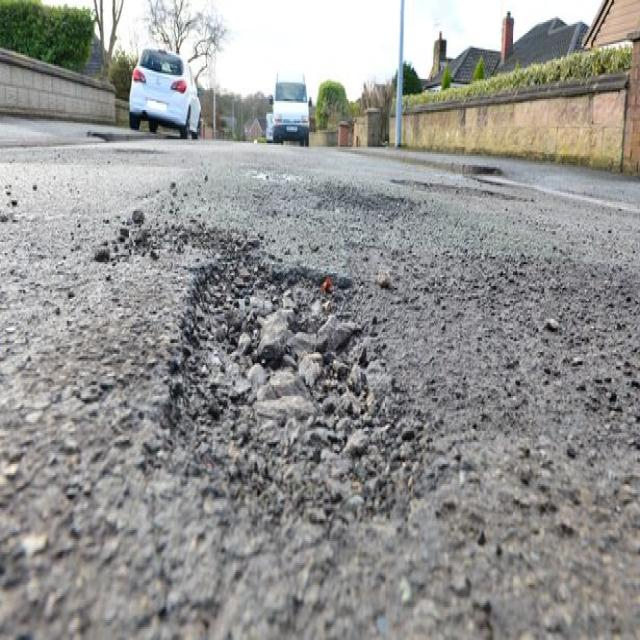

In [40]:
from IPython.display import Image

img_path = '/content/test/images/575_jpg.rf.e0621b6faf9cd648a29914d54bca3f42.jpg'
model_path = '/content/runs/segment/train322/weights/best.pt'

model = YOLO(model_path)
results = model(img_path)
Image(img_path)


0: 64x64 1 pothole, 7.2ms
Speed: 0.4ms preprocess, 7.2ms inference, 3.3ms postprocess per image at shape (1, 3, 64, 64)


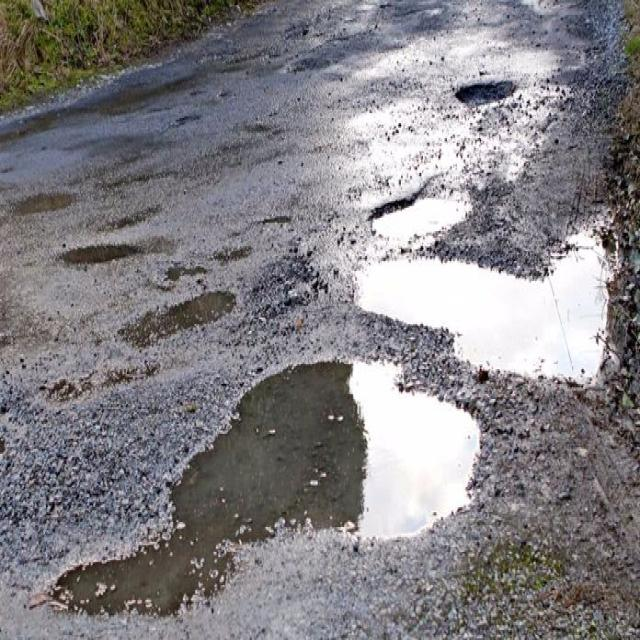

In [39]:
import cv2
from google.colab.patches import cv2_imshow

image_path ='/content/test/images/433_jpg.rf.05116ea0d7e035f4aa1a41a84ddd122e.jpg'
img=cv2.imread(image_path)

H,W,_=img.shape

model = YOLO(model_path)
results = model(img)
cv2_imshow(img)

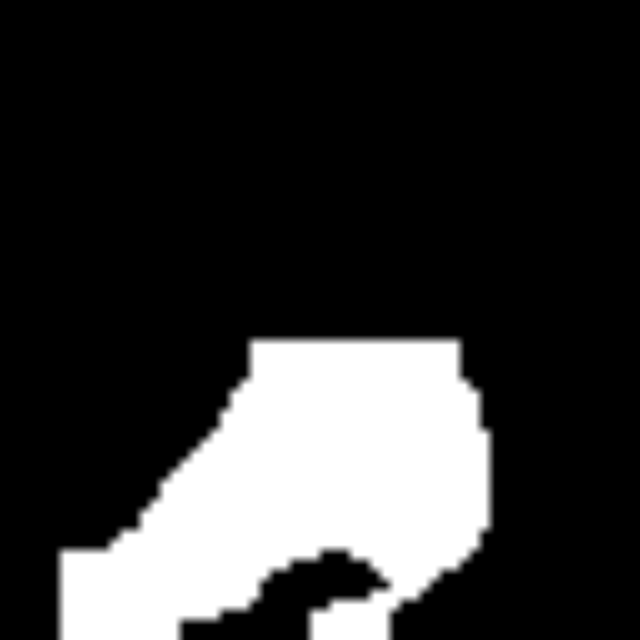

In [33]:
for result in results:
  for j, mask in enumerate(result.masks.data):
    mask = mask.cpu().numpy()*255
    mask=cv2.resize(mask,(W,H))
    cv2_imshow(mask)

